# Bucher data exploration

General notes:

* translate dates into weekdays and month
* 
# places: bus stops or parks, polygons
# map features: streets



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [4]:
os.getcwd()

'/Users/daksh_mac/Desktop/SmartCleanCityHackZurich19-master'

In [5]:
pred_msr = pd.read_csv("./data/2019-09-27-basel-measures-prediction-cleaned.csv", sep=";") 


In [6]:
msr = pd.read_csv("./data/2019-09-27-basel-measures-cleaned.csv", sep=";") #, keep_default_na = False) 


In [7]:
clt = pd.read_csv("./data/2019-09-27-basel-collections.csv", sep=",") 


In [8]:
msr.head()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
0,places,49,Leimgrubenweg,bus_stop,1175332462,287,2019-04-01 8:40:49,3.20000,0.60000,1.2,0.0,0,0,0,0.00000,0,0.0
1,map_features,49,Leimgrubenweg,secondary,25149740,86_9668,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
2,map_features,49,Reinacherstrasse,primary,117485263,86_11641,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
3,places,49,Leimgrubenweg,bus_stop,2621172927,287,2019-04-01 8:40:57,3.19757,0.60000,1.2,0.0,0,0,0,0.00243,0,0.0
4,map_features,49,Dornacherstrasse,secondary,148833576,86_12436,2019-04-01 8:42:11,5.00000,0.00000,0.0,0.0,0,0,0,0.00000,0,0.0


In [9]:
len(msr.place_name.unique())

323

In [10]:
msr.tail()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
58237,map_features,59,Feldbergstrasse,tertiary,182423029,86_12971,2019-09-20 16:40:16,3.692390,0.378171,0.929439,0.0,0,0,0,0.000000,0,0.0
58238,map_features,59,Feldbergstrasse,tertiary,182423029,86_12972,2019-09-20 16:40:16,3.782134,0.411573,0.806293,0.0,0,0,0,0.000000,0,0.0
58239,map_features,59,Klybeckstrasse,tertiary,182422859,86_12969,2019-09-20 16:40:20,3.867693,0.516248,0.615552,0.0,0,0,0,0.000508,0,0.0
58240,map_features,59,Amerbachstrasse,residential,97984332,86_1779,2019-09-20 16:41:08,4.399277,0.600000,0.000000,0.0,0,0,0,0.000723,0,0.0
58241,map_features,59,Offenburgerstrasse,residential,9398555,86_8723,2019-09-20 16:41:08,4.399277,0.600000,0.000000,0.0,0,0,0,0.000723,0,0.0


In [11]:
pred_msr.head()

,osm_id,cci_id,date
0,172611027,86_12812,2019-06-25 6:25:49
1,3828924874,260,2019-06-25 6:26:22
2,23913163,86_9255,2019-06-25 6:26:26
3,23913163,86_17476,2019-06-25 6:26:26
4,144481239,86_12223,2019-06-25 6:27:21


In [144]:
clt.head(10)

,city_id,osm_id,cci_id,type,geometry,coordinates
0,86,263256727.0,324,Place,Polygon,"POLYGON((7.601737973795679 47.532477, 7.601737..."
1,86,270322890.0,NaN,Place,Polygon,"POLYGON((7.568622384667696 47.561588, 7.568621..."
2,86,274674809.0,NaN,Place,Polygon,"POLYGON((7.589516633078348 47.5480482, 7.58951..."
3,86,583586314.0,251,Place,Polygon,"POLYGON((7.583728694181322 47.5640838, 7.58372..."
4,86,707688638.0,266,Place,Polygon,"POLYGON((7.569987711883181 47.5687268, 7.56998..."
5,86,707688677.0,266,Place,Polygon,"POLYGON((7.573156901658795 47.5660452, 7.57315..."
6,86,707688723.0,266,Place,Polygon,"POLYGON((7.573843098654215 47.5652571, 7.57384..."
7,86,707688727.0,266,Place,Polygon,"POLYGON((7.573092700297358 47.5656881, 7.57309..."
8,86,759733150.0,287,Place,Polygon,"POLYGON((7.564977301710264 47.5660587, 7.56497..."
9,86,759733151.0,287,Place,Polygon,"POLYGON((7.565369203143785 47.5664347, 7.56536..."


# Measures
## Unique Streets

In [12]:
list(msr.columns)

['collection',
 'suitcase_id',
 'place_name',
 'place_type',
 'osm_id',
 'cci_id',
 'date',
 'cci',
 'rateCigarrettes',
 'ratePapers',
 'rateBottles',
 'rateExcrements',
 'rateSyringues',
 'rateGums',
 'rateLeaves',
 'rateGrits',
 'rateGlassDebris']

In [13]:
msr.osm_id.unique()

array([1175332462,   25149740,  117485263, 2621172927,  148833576,
        148833583,  332477619,  332478283,  252383899,   25975626,
        409614914,  983964491,   19751448,  143768928,  983964501,
        448223496,  132752294,  151410233,  151407782,   19781280,
         24781497, 3353762767,  151410135, 3353762768,  328917831,
        335885353,  151410240,  137472348, 1954878895, 1175295158,
        172612128,  185791087,  148908746,  148908748, 1506797343,
        185796101,  172611027, 3828924874,   23913163,  147699865,
        144481237,  338511437,  338511439,  144275785,  375569527,
         26618754,   26720342,   26142545,  528876027,   26142544,
        235374843,  195809285,   11968619,  147699896,  255894086,
        147699871,  255894088,   25653972,   10158874, 1175169798,
         13251973,  182423147, 1175169752, 1175169781,  182423406,
        182422856, 1941178814, 1175169761,  138359214,   40968284,
         40968286,  137063229,  335110092, 2446067499,  144373

In [14]:
len(msr.osm_id.unique())

883





# Date Range?



In [16]:

msr.date

0         2019-04-01 8:40:49
1         2019-04-01 8:40:53
2         2019-04-01 8:40:53
3         2019-04-01 8:40:57
4         2019-04-01 8:42:11
                ...         
58237    2019-09-20 16:40:16
58238    2019-09-20 16:40:16
58239    2019-09-20 16:40:20
58240    2019-09-20 16:41:08
58241    2019-09-20 16:41:08
Name: date, Length: 58242, dtype: object

In [17]:
msr.head()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
0,places,49,Leimgrubenweg,bus_stop,1175332462,287,2019-04-01 8:40:49,3.20000,0.60000,1.2,0.0,0,0,0,0.00000,0,0.0
1,map_features,49,Leimgrubenweg,secondary,25149740,86_9668,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
2,map_features,49,Reinacherstrasse,primary,117485263,86_11641,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
3,places,49,Leimgrubenweg,bus_stop,2621172927,287,2019-04-01 8:40:57,3.19757,0.60000,1.2,0.0,0,0,0,0.00243,0,0.0
4,map_features,49,Dornacherstrasse,secondary,148833576,86_12436,2019-04-01 8:42:11,5.00000,0.00000,0.0,0.0,0,0,0,0.00000,0,0.0


In [18]:
msr.cci_id.groupby(msr.osm_id).count().head(20)

osm_id
4803830     194
4803831     133
4803852     129
4803859      57
4837930      59
4838574     111
4840867      67
4840869     123
9398550     141
9398555     184
9554150     123
9554151      53
9554159     139
9554160     121
9673526     102
9673528      84
9673533      48
9673534      96
10158873    151
10158874    140
Name: cci_id, dtype: int64

In [19]:
msr[['collection', 'place_type']].groupby(['place_type'])


In [21]:
msr.place_type.groupby(msr.collection).count()

collection
map_features    51093
places           7149
Name: place_type, dtype: int64

## Number intersections per street

In [22]:
#len(msr.cci_id.groupby(msr.osm_id).count())
msr.cci_id.groupby(msr.osm_id).count().head(20)

osm_id
4803830     194
4803831     133
4803852     129
4803859      57
4837930      59
4838574     111
4840867      67
4840869     123
9398550     141
9398555     184
9554150     123
9554151      53
9554159     139
9554160     121
9673526     102
9673528      84
9673533      48
9673534      96
10158873    151
10158874    140
Name: cci_id, dtype: int64

In [23]:
msr.cci_id.groupby(msr.osm_id).count().sort_values(ascending=False).head(20)

osm_id
151410240    300
24781497     269
23884886     241
19781280     233
13252023     233
10158891     226
605805584    220
23884883     219
23348441     215
182423029    213
24839329     206
335418859    205
332740546    203
333652248    198
19751448     196
19750775     196
4803830      194
109731333    188
183482915    186
9398555      184
Name: cci_id, dtype: int64

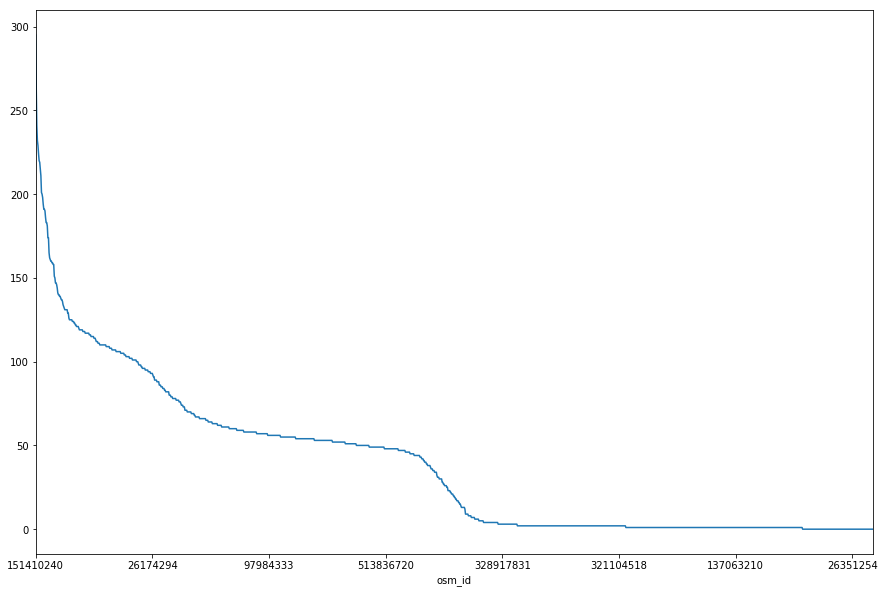

In [39]:
msr.cci_id.groupby(msr.osm_id).count().sort_values(ascending=False).plot(figsize=(15,10))

# Data by Place Type

In [24]:
msr.head()

,collection,suitcase_id,place_name,place_type,osm_id,cci_id,date,cci,rateCigarrettes,ratePapers,rateBottles,rateExcrements,rateSyringues,rateGums,rateLeaves,rateGrits,rateGlassDebris
0,places,49,Leimgrubenweg,bus_stop,1175332462,287,2019-04-01 8:40:49,3.20000,0.60000,1.2,0.0,0,0,0,0.00000,0,0.0
1,map_features,49,Leimgrubenweg,secondary,25149740,86_9668,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
2,map_features,49,Reinacherstrasse,primary,117485263,86_11641,2019-04-01 8:40:53,3.35764,0.44236,1.2,0.0,0,0,0,0.00000,0,0.0
3,places,49,Leimgrubenweg,bus_stop,2621172927,287,2019-04-01 8:40:57,3.19757,0.60000,1.2,0.0,0,0,0,0.00243,0,0.0
4,map_features,49,Dornacherstrasse,secondary,148833576,86_12436,2019-04-01 8:42:11,5.00000,0.00000,0.0,0.0,0,0,0,0.00000,0,0.0


In [25]:
msr.place_type.value_counts()

residential       19858
secondary         10218
primary            6701
bus_stop           5915
tertiary           4446
footway            4302
unclassified       2313
pedestrian         1754
no type found      1234
cycleway            723
secondary_link      229
service             196
steps                86
primary_link         78
living_street        70
path                 69
motorway_link        50
Name: place_type, dtype: int64

In [26]:
msr.collection.value_counts()

map_features    51093
places           7149
Name: collection, dtype: int64

In [27]:
bla = msr.place_type.value_counts()

In [28]:
bla = bla.to_frame

In [29]:
bla

<bound method Series.to_frame of residential       19858
secondary         10218
primary            6701
bus_stop           5915
tertiary           4446
footway            4302
unclassified       2313
pedestrian         1754
no type found      1234
cycleway            723
secondary_link      229
service             196
steps                86
primary_link         78
living_street        70
path                 69
motorway_link        50
Name: place_type, dtype: int64>

# Group by place type and CCI

In [30]:
df = msr[["place_type", "cci"]]
df.head()

,place_type,cci
0,bus_stop,3.20000
1,secondary,3.35764
2,primary,3.35764
3,bus_stop,3.19757
4,secondary,5.00000


In [34]:
df.groupby(['place_type']).mean()

In [36]:
df.cci

0        3.200000
1        3.357640
2        3.357640
3        3.197570
4        5.000000
           ...   
58237    3.692390
58238    3.782134
58239    3.867693
58240    4.399277
58241    4.399277
Name: cci, Length: 58242, dtype: float64

In [45]:
df.cci.dtype

dtype('float64')

In [46]:
msr.suitcase_id.value_counts()

49    41570
59    16672
Name: suitcase_id, dtype: int64

In [47]:
cal = pd.read_csv("./data/event_cal.csv", sep=";")


In [48]:
cal

,day,Unnamed: 1
0,01.01.2019,NaN
1,11.03.2019,NaN
2,12.03.2019,NaN
3,13.03.2019,NaN
4,19.04.2019,NaN
5,21.04.2019,NaN
6,22.04.2019,NaN
7,01.05.2019,NaN
8,30.05.2019,NaN
9,09.06.2019,NaN


In [49]:
import datetime

In [50]:
datetime.datetime.fromtimestamp(1527509762)

datetime.datetime(2018, 5, 28, 17, 46, 2)